In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bollywood-movies-dataset/Data for repository.csv


In [2]:
df = pd.read_csv("/kaggle/input/bollywood-movies-dataset/Data for repository.csv")
df.head()

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
0,Golden Boys,Normal,No,No,suspense,Yes,No,No,Jeet Goswami,Ravi Varma,Baba Jagirdar,5,5000000,85000
1,Kaccha Limboo,Holiday,No,No,drama,Yes,No,Yes,Karan Bhanushali,Sagar Ballary,Amardeep Nijjer,75,15000000,825000
2,Not A Love Story,Holiday,No,No,thriller,No,No,No,Mahie Gill,Ram Gopal Verma,Sandeep Chowta,525,75000000,56700000
3,Qaidi Band,Holiday,No,No,drama,Yes,No,No,Aadar Jain,Habib Faisal,Amit Trivedi,800,210000000,4500000
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000


All columns in the datasets.

In [3]:
print("All columns in the datset are :",list(df.columns))

All columns in the datset are : ['Movie Name', 'Release Period', 'Whether Remake', 'Whether Franchise', 'Genre', 'New Actor', 'New Director', 'New Music Director', 'Lead Star', 'Director', 'Music Director', 'Number of Screens', 'Revenue(INR)', 'Budget(INR)']


What is the average revenue for all movies in the dataset?

In [4]:
print(f"Average of all the movies in dataset : Rs. {df['Revenue(INR)'].mean()}")

Average of all the movies in dataset : Rs. 150167388.10365134


Calculate the total revenue for each genre

In [5]:
# Calculate the total revenue for each genre
df.groupby('Genre')['Revenue(INR)'].sum().reset_index()

,Genre,Revenue(INR)
0,action,43936750000
1,adult,308700000
2,animation,292500000
3,comedy,43370500000
4,documentary,390000000
5,drama,70477075000
6,fantasy,2595000000
7,horror,3768500000
8,love_story,20539500000
9,masala,16040000000


Find the movie with the highest revenue

In [6]:
# Find the movie with the highest revenue.
df[df['Revenue(INR)'] == df['Revenue(INR)'].max()]
#sorted(df['Revenue(INR)'])[-1] #2100000000

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
1240,Tiger Zinda Hai,Holiday,No,Yes,action,No,No,No,Salman Khan,Ali Abbas Zafar,Vishal - Shekhar,4600,2100000000,5651020000


Identify the most common lead star in the dataset.

In [7]:
# Identify the most common lead star in the dataset.
df['Lead Star'].value_counts().head().reset_index()

,Lead Star,count
0,Akshay Kumar,48
1,Ajay Devgn,35
2,Emraan Hashmi,27
3,Salman Khan,27
4,Amitabh Bachchan,21


What is the median revenue for movies in the 'Action' genre?

In [8]:
# What is the median revenue for movies in the 'Action' genre?
df[df["Genre"] == "action"]["Revenue(INR)"].median()

210000000.0

In [9]:
# How many movies are remakes, and how many are not?
print("Total movies in dataset :", len(df))
print("-"*50)
print("Total remakes :",len(df[df["Whether Remake"] == "Yes"]))
print("Total non-remakes :",len(df[df["Whether Remake"] == "No"]))



Total movies in dataset : 1698
--------------------------------------------------
Total remakes : 71
Total non-remakes : 1627


In [10]:
# Calculate the average revenue for movies in each release period.
df.groupby("Release Period")["Revenue(INR)"].mean()

Release Period
Holiday    1.982476e+08
Normal     1.215181e+08
Name: Revenue(INR), dtype: float64

In [11]:

# Identify the movie with the highest number of screens.
df[df["Number of Screens"] == df["Number of Screens"].max()]

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
1240,Tiger Zinda Hai,Holiday,No,Yes,action,No,No,No,Salman Khan,Ali Abbas Zafar,Vishal - Shekhar,4600,2100000000,5651020000


In [12]:
# Find the top 5 directors with the highest average revenue.

df.groupby("Director")["Revenue(INR)"].mean()
#df.sort_values(by='Column_Name')

director_revenue = df.groupby("Director")["Revenue(INR)"].mean().reset_index()
director_revenue_sorted = director_revenue.sort_values(by="Revenue(INR)", ascending=False)
director_revenue_sorted.head()


,Director,Revenue(INR)
740,S.S. Rajamouli,1.825000e+09
759,Sajid Nadiadwala,1.400000e+09
65,Ali Abbas Zafar,1.095000e+09
992,Vijay Krishna Acharya,1.030000e+09
896,Sooraj Barjatya,9.400000e+08


In [13]:
# What is the median revenue for movies that belong to a franchise?
df[df["Whether Franchise"] == "Yes"]["Revenue(INR)"].median()

290000000.0

In [14]:
# How many movies were released in each period?
print("Total Movies :", len(df))
print("Total movies in Each period")
print("-"*50)
df["Release Period"].value_counts().reset_index()

Total Movies : 1698
Total movies in Each period
--------------------------------------------------


,Release Period,count
0,Normal,1064
1,Holiday,634


In [15]:
# Calculate the average revenue for movies with a new actor versus those without a new actor.

print("With new actor:", df[df["New Actor"] == "Yes"]["Revenue(INR)"].mean())
print("Without new actor:", df[df["New Actor"] == "No"]["Revenue(INR)"].mean())

With new actor: 49675604.395604394
Without new actor: 186952393.40305713


In [16]:
# Determine the most frequent music director in the dataset.
df["Music Director"].value_counts().sort_values(ascending=False).head().reset_index()[0:1]

,Music Director,count
0,Pritam,92


In [17]:
# What is the average revenue for movies with a new director?
df[df["New Director"] == "Yes"]["Revenue(INR)"].mean()

75523314.9509804

In [18]:
# How many movies have a new music director and a new actor simultaneously?
df[(df["New Director"] == "Yes") & (df["New Actor"] == "Yes")].head()


,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR)
4,Chaatwali,Holiday,No,No,adult,Yes,Yes,Yes,Aadil Khan,Aadil Khan,Babloo Ustad,1,1000000,1075000
5,Shuttlecock Boys,Normal,No,No,comedy,Yes,Yes,Yes,Aakar Kaushik,Hemant Gaba,Avinash Baghel,10,5000000,170000
18,Pyaar Mein Aisa Hota Hai,Holiday,No,No,thriller,Yes,Yes,Yes,Aanamika Bawa,Rajesh Kumar,Shabab Azmi,5,5500000,350000
19,Gurjar Aandolan - A Fight For Right,Normal,No,No,drama,Yes,Yes,Yes,Aarun Nagar,Aarun Nagar,Ashish Donald,5,6500000,575000
22,Dreams - Sapnay Sach Honge...,Holiday,No,No,love_story,Yes,Yes,No,Aashish Chanana,Aashish Chanana,Sajid - Wajid,25,12500000,1375000


In [19]:
# Calculate the total revenue for each lead star.
df.groupby("Lead Star")["Revenue(INR)"].sum().sort_values(ascending = False).reset_index().head()

,Lead Star,Revenue(INR)
0,Akshay Kumar,24420000000
1,Salman Khan,18520000000
2,Ajay Devgn,15155000000
3,Shahrukh Khan,13660000000
4,Ranbir Kapoor,10107500000


In [20]:
# Determine the most profitable franchise in terms of revenue.
df["Profit"] = df["Revenue(INR)"] - df["Budget(INR)"]
df[df["Whether Franchise"] == "Yes"].sort_values(by="Revenue(INR)", ascending=False).head()

#sort_values(by="Revenue(INR)", ascending=False)

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Profit
1240,Tiger Zinda Hai,Holiday,No,Yes,action,No,No,No,Salman Khan,Ali Abbas Zafar,Vishal - Shekhar,4600,2100000000,5651020000,-3551020000
947,Bahubali 2 - The Conclusion,Holiday,No,Yes,masala,No,No,No,Prabhas,S.S. Rajamouli,M.M. Kreem,3950,1950000000,8016120000,-6066120000
17,Dhoom 3,Normal,No,Yes,action,No,No,No,Aamir Khan,Vijay Krishna Acharya,Pritam,3650,1750000000,5243760000,-3493760000
121,Golmaal Again,Holiday,No,Yes,comedy,No,No,Yes,Ajay Devgn,Rohit Shetty,DJ Chetas,3300,1420000000,3110450000,-1690450000
646,Welcome Back,Holiday,No,Yes,comedy,No,No,No,John Abraham,Anees Bazmee,Meet Bros,3200,1080000000,1687670000,-607670000


In [21]:
# What is the average revenue for movies in each genre and release period combination?
df.groupby(["Genre", "Release Period"])["Revenue(INR)"].mean().reset_index()


,Genre,Release Period,Revenue(INR)
0,action,Holiday,4.698770e+08
1,action,Normal,2.239766e+08
2,adult,Holiday,3.854167e+06
3,adult,Normal,4.046429e+06
4,animation,Holiday,1.300000e+08
5,animation,Normal,3.250000e+07
6,comedy,Holiday,2.000842e+08
7,comedy,Normal,1.289021e+08
8,documentary,Normal,3.900000e+08
9,drama,Holiday,1.318810e+08


In [22]:
result = df.groupby(["Genre", "Release Period"]).agg({'Revenue(INR)': 'mean'}).reset_index()
result.columns = ['Genre', 'Release Period', 'Mean Revenue']
result

,Genre,Release Period,Mean Revenue
0,action,Holiday,4.698770e+08
1,action,Normal,2.239766e+08
2,adult,Holiday,3.854167e+06
3,adult,Normal,4.046429e+06
4,animation,Holiday,1.300000e+08
5,animation,Normal,3.250000e+07
6,comedy,Holiday,2.000842e+08
7,comedy,Normal,1.289021e+08
8,documentary,Normal,3.900000e+08
9,drama,Holiday,1.318810e+08


In [23]:
# Find the director who has worked on the most movies.

df["Director"].value_counts().sort_values(ascending = False).head(10).reset_index()

,Director,count
0,Ram Gopal Verma,18
1,Priyadarshan,16
2,Vikram Bhatt,16
3,Suresh Jain,15
4,Rohit Shetty,11
5,Mohit Suri,11
6,Anurag Kashyap,10
7,Madhur Bhandarkar,9
8,Anees Bazmee,9
9,David Dhawan,8


In [24]:
# Calculate the total revenue for movies in each release period with a new actor.
df[df["New Actor"] == "Yes"].groupby("Release Period")["Revenue(INR)"].sum()

Release Period
Holiday     7822750000
Normal     14779650000
Name: Revenue(INR), dtype: int64

In [25]:

# Identify movies where the lead star is also the director.
df[df["Lead Star"] == df["Director"]][["Movie Name","Director"]]

,Movie Name,Director
4,Chaatwali,Aadil Khan
9,Taare Zameen Par,Aamir Khan
19,Gurjar Aandolan - A Fight For Right,Aarun Nagar
22,Dreams - Sapnay Sach Honge...,Aashish Chanana
68,Bandook,Aditya Om
90,U Me Aur Hum,Ajay Devgn
91,Shivaay,Ajay Devgn
246,Staying Alive,Anant Mahadevan
249,Happy Husbands,Anay
260,Mr Ya Miss,Antara Mali


In [26]:

# Determine the correlation between the number of screens and revenue.
df["Number of Screens"].corr(df["Revenue(INR)"])

0.8977651709284016

In [27]:
# What is the average revenue for movies directed by new directors?
df[df["New Director"] == "Yes"]["Revenue(INR)"].mean()

75523314.9509804

In [28]:
# Find the movie with the lowest revenue.
df[df["Revenue(INR)"] == df["Revenue(INR)"].min()]

,Movie Name,Release Period,Whether Remake,Whether Franchise,Genre,New Actor,New Director,New Music Director,Lead Star,Director,Music Director,Number of Screens,Revenue(INR),Budget(INR),Profit
718,It Can Be Dangerous - City Of Dreams,Normal,No,No,drama,No,Yes,Yes,Kiran Janjani,Mahesh D. Singh,Niranjan - Saket,40,325000,450000,-125000


In [29]:
# Calculate the average revenue for movies in the 'Drama' genre with a new music director.
df[(df["Genre"] == "drama") & (df["New Music Director"] == "Yes")]["Revenue(INR)"].mean()

46155408.1632653


Financial Analysis:

What is the distribution of revenue, budget, and profit?
Is there any correlation between budget and revenue?
How do profits vary across different genres?
Are franchise movies more profitable compared to non-franchise ones?
Is there any trend in the revenue and budget over different release periods?
Cast and Crew Analysis:

Who are the most frequently appearing lead stars, directors, and music directors?
Is there any correlation between the lead star/director/music director and the movie's revenue?
Do movies with new actors/directors/music directors perform differently in terms of revenue/profit?
Screen Presence:

How does the number of screens affect revenue and profit?
Are movies released on more screens generally more profitable?
Visualization and Trends:

Can you visualize the distribution of revenue, budget, and profit using histograms or box plots?
Are there any noticeable trends or patterns over the years in terms of revenue, budget, or profit?
Can you visualize the relationship between budget and revenue using a scatter plot?
Franchise Analysis:

How does the performance (revenue, profit) of movies in a franchise compare to standalone movies?
Is there any trend in the revenue or profit of a franchise over its sequels?
Genre Analysis:

Which genres tend to have higher revenue and profit?
Are certain genres more likely to be remade or belong to a franchise?
How has the popularity of different genres changed over time?
Correlation Analysis:

Can you identify any correlations between different variables such as budget, revenue, profit, and number of screens?
Are there any interesting relationships between variables that stand out?
Outlier Detection:

Are there any outliers in terms of revenue, budget, or profit? If so, can you identify any patterns or reasons for these outliers?
Predictive Analysis:

Can you build a predictive model to forecast a movie's revenue or profit based on its features such as genre, lead star, director, budget, etc.?
How accurate is your predictive model, and which features contribute the most to predicting revenue/profit?

### (A) General Overview:

What is the distribution of movies across different release periods?

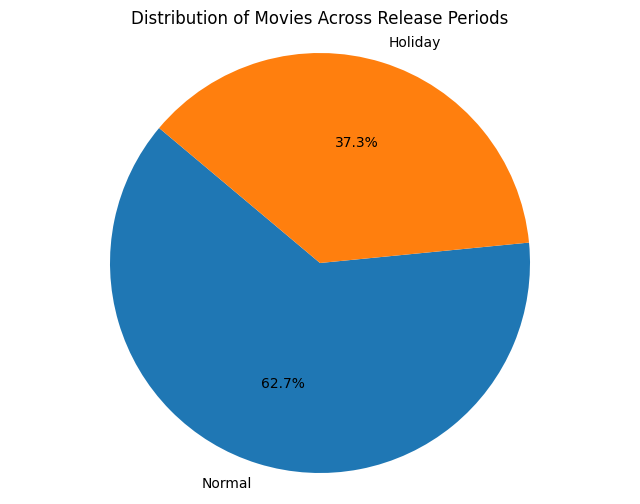

In [30]:

import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the movies dataset

# Calculate the value counts for the "Release Period" column
release_period_counts = df["Release Period"].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(release_period_counts, labels=release_period_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movies Across Release Periods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


How many movies are remakes and how many are original?

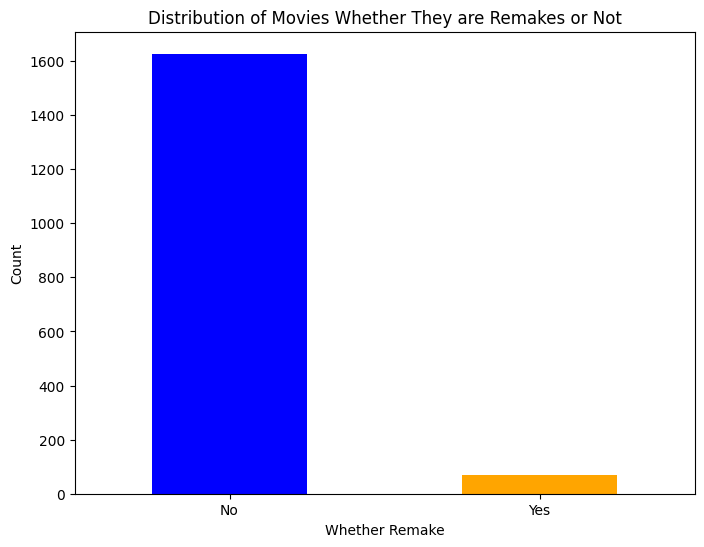

In [31]:
whether_remakes_counts = df["Whether Remake"].value_counts()

# Plotting the bar diagram
plt.figure(figsize=(8, 6))
whether_remakes_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Movies Whether They are Remakes or Not')
plt.xlabel('Whether Remake')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

What percentage of movies belong to a franchise?

In [32]:
total_movies = len(df)

franchise_movies_count = len(df[df["Whether Franchise"] == "Yes"])

# Calculate the percentage of movies belonging to a franchise
percentage_franchise_movies = (franchise_movies_count / total_movies) * 100

print("Percentage of movies belonging to a franchise:", percentage_franchise_movies)

Percentage of movies belonging to a franchise: 4.829210836277975


What are the most common genres in the dataset?

In [33]:
print("Total Genres :",len(list(df['Genre'].unique())))
print("-"*80)
print("Genres :",list(df['Genre'].unique()))

Total Genres : 14
--------------------------------------------------------------------------------
Genres : ['suspense', 'drama', 'thriller', 'adult', 'comedy', 'action', 'love_story', 'rom__com', 'horror', 'fantasy', 'masala', 'mythological', 'animation', 'documentary']


How many movies feature new actors, directors, or music directors?

In [34]:
print("Movies with new actor, new director and new music director :",len(df[(df["New Actor"] == "Yes") & (df["New Director"] == "Yes") & (df["New Music Director"] == "Yes")]))

Movies with new actor, new director and new music director : 186


### (B) Financial Analysis:

What is the distribution of revenue, budget, and profit? 

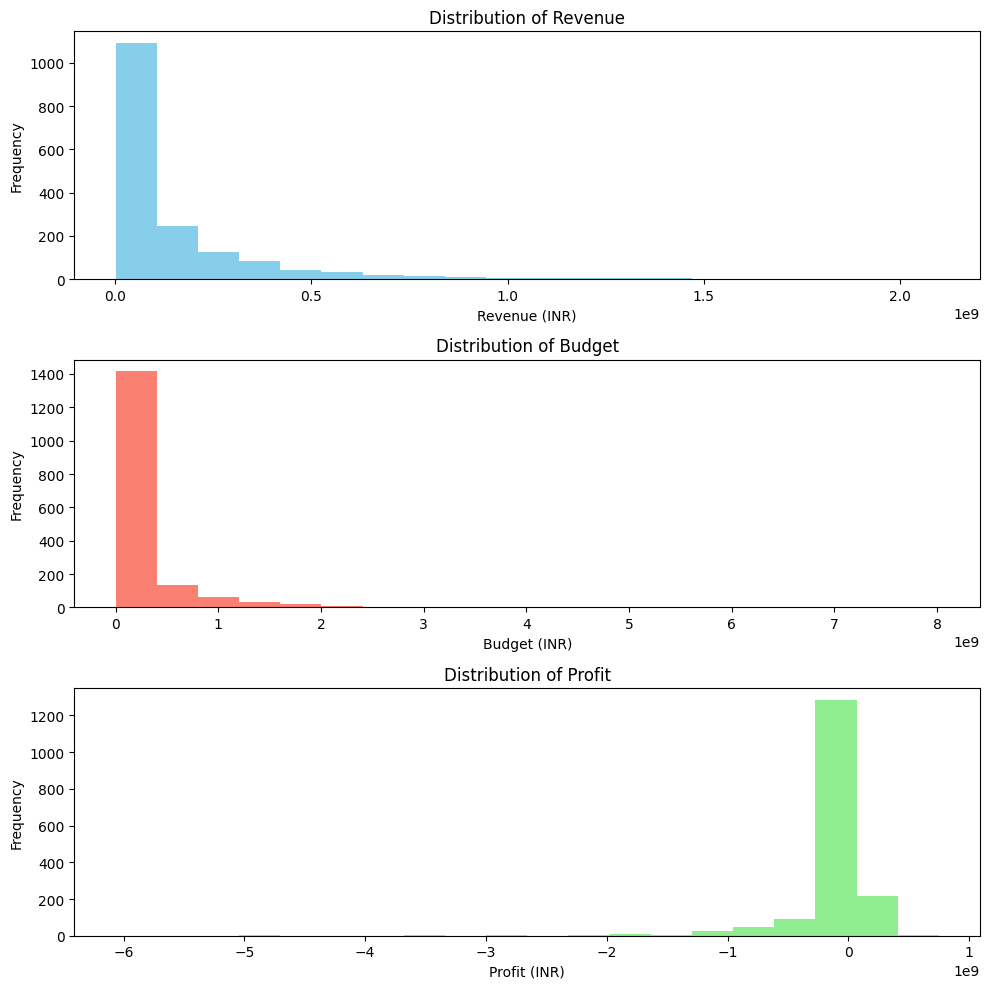

In [35]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the movies dataset

# Create subplots for revenue, budget, and profit histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot revenue histogram
axes[0].hist(df['Revenue(INR)'], bins=20, color='skyblue')
axes[0].set_title('Distribution of Revenue')
axes[0].set_xlabel('Revenue (INR)')
axes[0].set_ylabel('Frequency')

# Plot budget histogram
axes[1].hist(df['Budget(INR)'], bins=20, color='salmon')
axes[1].set_title('Distribution of Budget')
axes[1].set_xlabel('Budget (INR)')
axes[1].set_ylabel('Frequency')

# Plot profit histogram
axes[2].hist(df['Profit'], bins=20, color='lightgreen')
axes[2].set_title('Distribution of Profit')
axes[2].set_xlabel('Profit (INR)')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Is there any correlation between budget and revenue?

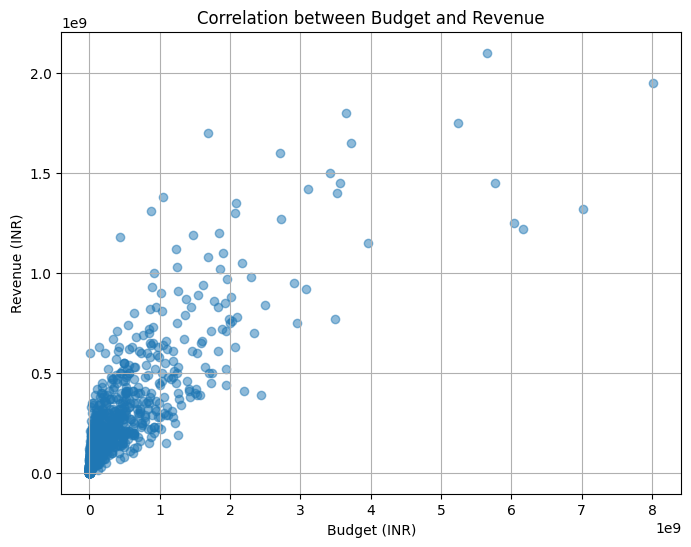

In [36]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the movies dataset

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Budget(INR)"], df["Revenue(INR)"], alpha=0.5)
plt.title('Correlation between Budget and Revenue')
plt.xlabel('Budget (INR)')
plt.ylabel('Revenue (INR)')
plt.grid(True)
plt.show()


In [37]:


# Assuming df is your DataFrame containing the movies dataset

# Calculate the correlation between budget and revenue
correlation = df['Budget(INR)'].corr(df['Revenue(INR)'])

print("Correlation between budget and revenue:", correlation)

Correlation between budget and revenue: 0.8434464800307456


You can see here that there is a positive correlation between Budget and Revenue.

How do profits vary across different genres?

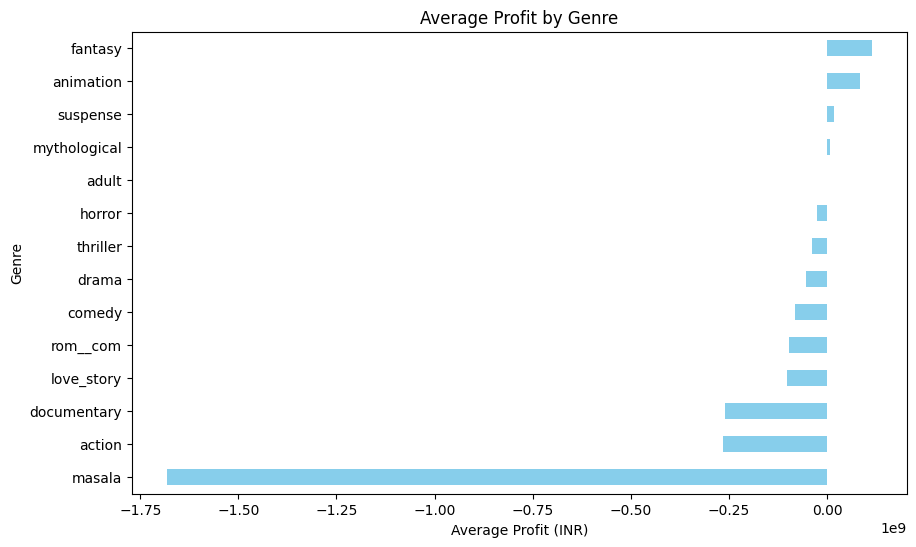

In [38]:
genre_profit_means = df.groupby('Genre')['Profit'].mean().sort_values()

# Plotting the bar diagram
plt.figure(figsize=(10, 6))
genre_profit_means.plot(kind='barh', color='skyblue')
plt.title('Average Profit by Genre')
plt.xlabel('Average Profit (INR)')
plt.ylabel('Genre')
plt.show()

Are franchise movies more profitable compared to non-franchise ones?

Is there any trend in the revenue and budget over different release periods?